## POSTTEST 8(DEEP LEARNING)

## IMPORT PACKAGE
- Scikit-Learn(Sklearn)
- Tensorflow
- Matplotlib
- Numpy

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

## 1. REGRESSION-DNN

## Buat Data

In [2]:
x = np.array([1,2,3,4,5,6],dtype = float)
y = np.array([2,3,4,8,10,12],dtype= float)

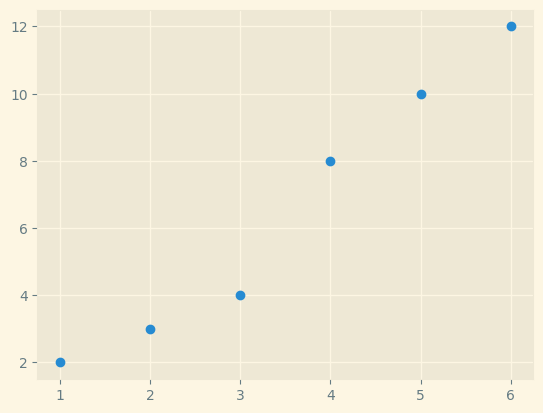

In [3]:
plt.style.use('Solarize_Light2')

plt.scatter(x, y)
plt.show()

## Buat Sequential Model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

## Modeling Steps

## a. Bangun arsitekturnya

In [5]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])

## b. Konfigurasi model

In [6]:
model.compile(optimizer='adam', loss='mae')

## c. Pelatihan model

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 1e-4):
            self.model.stop_training = True
            
cb = myCallback()

model.fit(x,y, epochs=500, steps_per_epoch=10, callbacks=cb)

Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 5.6422
Epoch 2/500
10/10 [==============================] - 0s 887us/step - loss: 4.5554
Epoch 3/500
10/10 [==============================] - 0s 997us/step - loss: 4.7181
Epoch 4/500
10/10 [==============================] - 0s 998us/step - loss: 4.6791
Epoch 5/500
10/10 [==============================] - 0s 887us/step - loss: 5.4639
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 4.3997
Epoch 7/500
10/10 [==============================] - 0s 1ms/step - loss: 4.2093
Epoch 8/500
10/10 [==============================] - 0s 997us/step - loss: 5.3791
Epoch 9/500
10/10 [==============================] - 0s 998us/step - loss: 4.5816
Epoch 10/500
10/10 [==============================] - 0s 1ms/step - loss: 4.8393
Epoch 11/500
10/10 [==============================] - 0s 1ms/step - loss: 4.2531
Epoch 12/500
10/10 [==============================] - 0s 887us/step - loss: 4.7046
Epoch 13/500
10/10 [===

## 2. MNIST

## Load Dataset

In [8]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.fashion_mnist.load_data()

In [9]:
print(y_train_raw[0])
print(x_train_raw.shape)
print(x_test_raw.shape)

9
(60000, 28, 28)
(10000, 28, 28)


## Label Encoding

In [10]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Preview Gambar

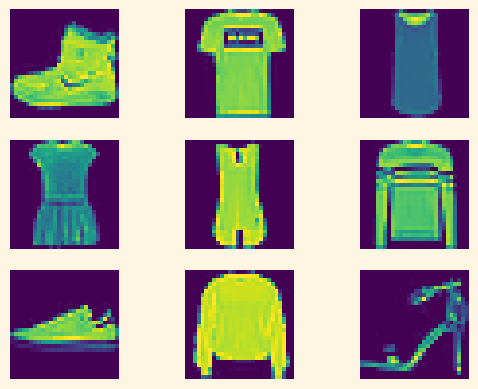

In [11]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

## Reshape Gambar

In [12]:
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

## Normalisasi

In [13]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Buat Model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=784),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(124, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 124)               31868     
                                                                 
 dense_5 (Dense)             (None, 128)               16000     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 582,406
Trainable params: 582,406
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training Model

In [16]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=[x_test, y_test])

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5096 - accuracy: 0.8180 - val_loss: 0.4020 - val_accuracy: 0.8551
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3597 - accuracy: 0.8680 - val_loss: 0.4020 - val_accuracy: 0.8568
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3253 - accuracy: 0.8803 - val_loss: 0.3585 - val_accuracy: 0.8689
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3024 - accuracy: 0.8874 - val_loss: 0.3533 - val_accuracy: 0.8701
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2828 - accuracy: 0.8958 - val_loss: 0.3536 - val_accuracy: 0.8778
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2664 - accuracy: 0.9011 - val_loss: 0.3453 - val_accuracy: 0.8777
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2579 - accuracy: 0.9035 - val_loss: 0.3555 - val_accuracy: 0.8760
Epoch 

## History Training

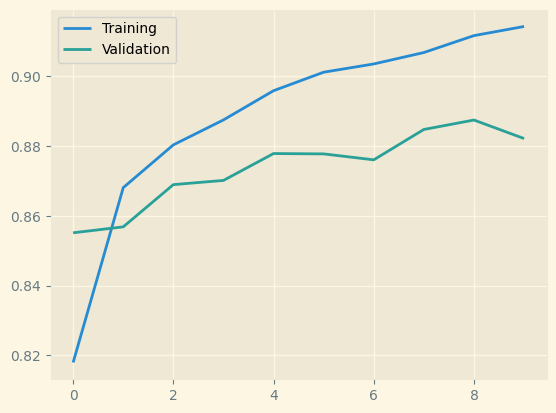

In [17]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

## Evaluasi Model

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8821


[0.3329441249370575, 0.882099986076355]

## Save Model

In [19]:
model.save('model/model.h5')

## Load Model

In [20]:
model_saved = tf.keras.models.load_model('model/model.h5')
model_saved.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 124)               31868     
                                                                 
 dense_5 (Dense)             (None, 128)               16000     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 582,406
Trainable params: 582,406
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_saved.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8821


[0.3329441249370575, 0.882099986076355]

## Prediksi Model

In [22]:
hasil = model_saved.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [23]:
x_train.shape

(60000, 784)

In [24]:
np.unique(y_train_raw)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

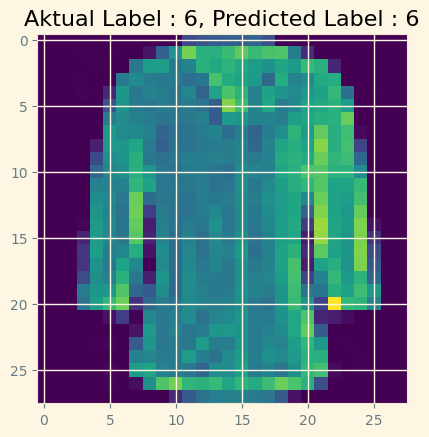

In [26]:
label = np.argmax(hasil,axis=1)
ActualLabel = np.argmax(y_test[4])

img = x_test[4].reshape(28, 28)

plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[4]}")
plt.imshow(img)
plt.show()

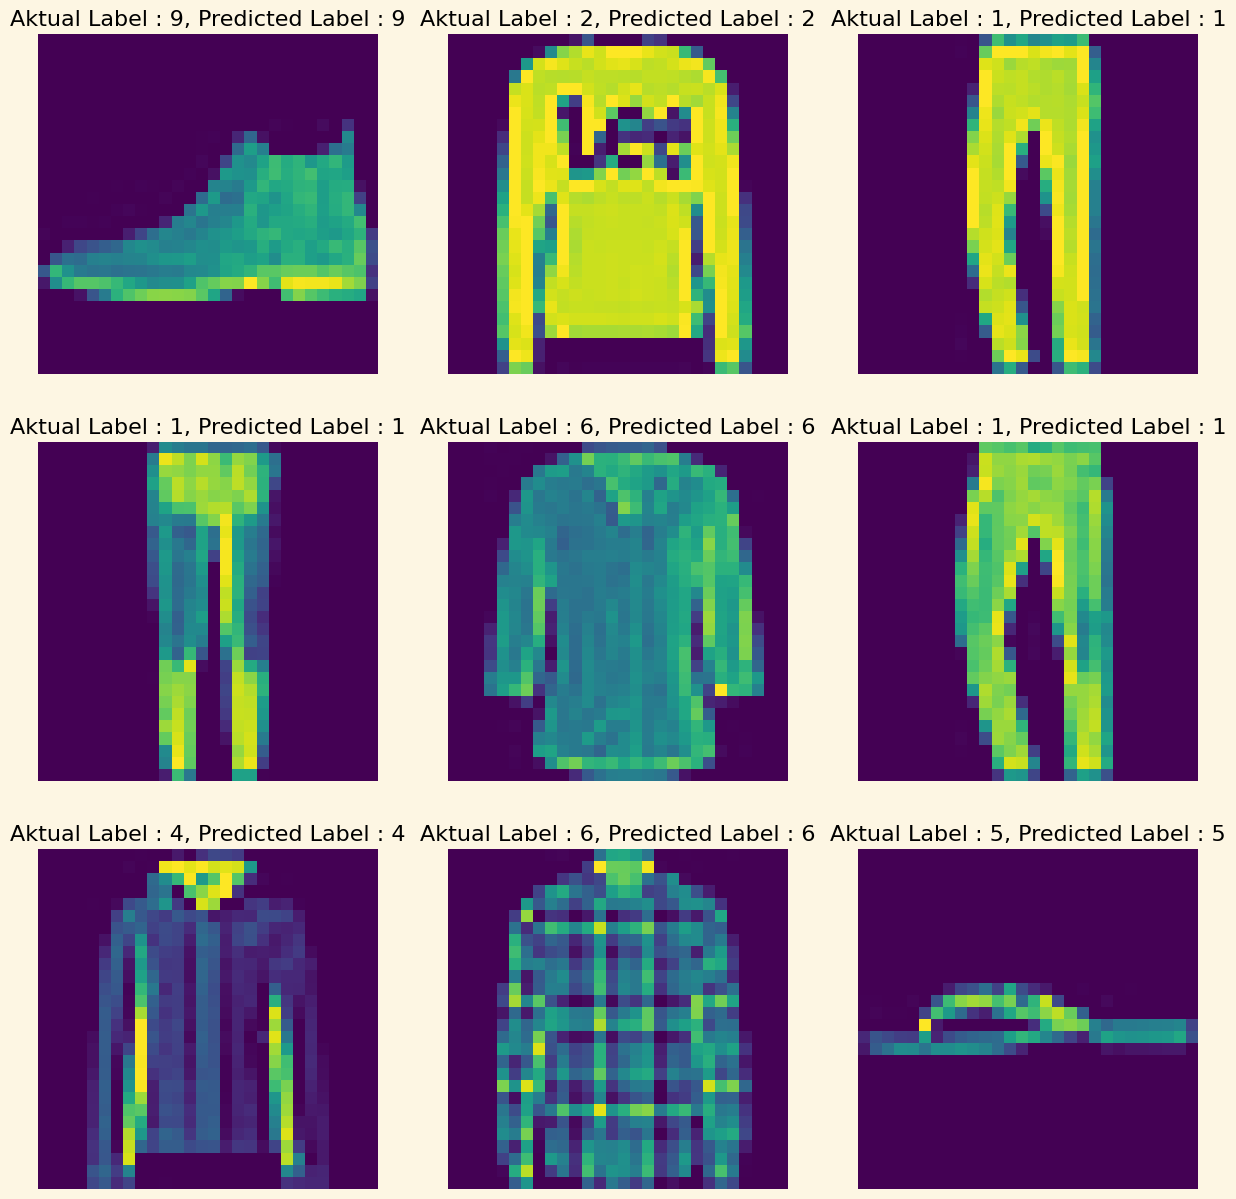

In [27]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)

  ActualLabel = np.argmax(y_test[i])
  plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[i]}")
  plt.imshow(x_test[i].reshape(28, 28))
  plt.axis('off')

plt.show()